In [1]:
!pip install numpy
!pip install pandas

In [2]:
import warnings
warnings.simplefilter('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # Walking through directores
import io
from scipy import stats # Data manipulation

In [4]:
# Read CSV and load the data to DataFrame 
df = pd.read_csv("cardio_cleaned_0.csv")
df.head(5)

Unnamed: 0  age  gender  height  weight  systolic_BP  diastolic_BP  \
0           0   50       0     168    62.0          110            80   
1           1   55       1     156    85.0          140            90   
2           2   51       1     165    64.0          130            70   
3           3   48       0     169    82.0          150           100   
4           4   47       1     156    56.0          100            60   

   cholesterol  glucose  smoke  alcohol  active  disease        bmi  \
0            1        1      0        0       1        0  21.967120   
1            3        1      0        0       1        1  34.927679   
2            3        1      0        0       0        1  23.507805   
3            1        1      0        0       1        1  28.710479   
4            1        1      0        0       0        0  23.011177   

   pulse pressure   BP_stage age_range weight_status  
0              30     Normal   elderly        normal  
1              50  High_BP_2   elderly         obese  
2              60  High_BP_1   elderly        normal  
3              50  High_BP_2   elderly    overweight  
4              40     Normal   elderly        normal

In [5]:
# Drop 'BP_stage', 'age_range', and 'weight_status' from the data features

df.drop(columns=['BP_stage'], inplace=True)
df.drop(columns=['age_range'], inplace=True)
df.drop(columns=['weight_status'], inplace=True)
df.head(5)

Unnamed: 0  age  gender  height  weight  systolic_BP  diastolic_BP  \
0           0   50       0     168    62.0          110            80   
1           1   55       1     156    85.0          140            90   
2           2   51       1     165    64.0          130            70   
3           3   48       0     169    82.0          150           100   
4           4   47       1     156    56.0          100            60   

   cholesterol  glucose  smoke  alcohol  active  disease        bmi  \
0            1        1      0        0       1        0  21.967120   
1            3        1      0        0       1        1  34.927679   
2            3        1      0        0       0        1  23.507805   
3            1        1      0        0       1        1  28.710479   
4            1        1      0        0       0        0  23.011177   

   pulse pressure  
0              30  
1              50  
2              60  
3              50  
4              40

In [6]:
# Drop 'Unnamed: 0' from the data features
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head(5)

age  gender  height  weight  systolic_BP  diastolic_BP  cholesterol  \
0   50       0     168    62.0          110            80            1   
1   55       1     156    85.0          140            90            3   
2   51       1     165    64.0          130            70            3   
3   48       0     169    82.0          150           100            1   
4   47       1     156    56.0          100            60            1   

   glucose  smoke  alcohol  active  disease        bmi  pulse pressure  
0        1      0        0       1        0  21.967120              30  
1        1      0        0       1        1  34.927679              50  
2        1      0        0       0        1  23.507805              60  
3        1      0        0       1        1  28.710479              50  
4        1      0        0       0        0  23.011177              40

In [7]:
# Dataset Information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57458 entries, 0 to 57457
Data columns (total 14 columns):
age               57458 non-null int64
gender            57458 non-null int64
height            57458 non-null int64
weight            57458 non-null float64
systolic_BP       57458 non-null int64
diastolic_BP      57458 non-null int64
cholesterol       57458 non-null int64
glucose           57458 non-null int64
smoke             57458 non-null int64
alcohol           57458 non-null int64
active            57458 non-null int64
disease           57458 non-null int64
bmi               57458 non-null float64
pulse pressure    57458 non-null int64
dtypes: float64(2), int64(12)
memory usage: 6.1 MB


In [8]:
#Details of the data
pd.DataFrame({'missingPerc': df.isna().mean(),
              'uniques': df.nunique(),
              '%uniquePerc': round((df.nunique()/df.shape[0])*100, 2),
              'data_types': df.dtypes,
              'mean': round(df.mean(), 2),
              'median': round(df.median(), 2),
              'std': round(df.std(), 2),
              'min': round(df.min(), 2),
              'max': round(df.max(), 2)})

missingPerc  uniques  %uniquePerc data_types    mean  median  \
age                     0.0       22         0.04      int64   52.74   53.00   
gender                  0.0        2         0.00      int64    0.64    1.00   
height                  0.0       41         0.07      int64  165.00  165.00   
weight                  0.0      169         0.29    float64   74.95   73.00   
systolic_BP             0.0      142         0.25      int64  129.14  120.00   
diastolic_BP            0.0      147         0.26      int64   97.08   80.00   
cholesterol             0.0        3         0.01      int64    1.36    1.00   
glucose                 0.0        3         0.01      int64    1.23    1.00   
smoke                   0.0        2         0.00      int64    0.09    0.00   
alcohol                 0.0        2         0.00      int64    0.06    0.00   
active                  0.0        2         0.00      int64    0.80    1.00   
disease                 0.0        2         0.00      int64    0.50    1.00   
bmi                     0.0     2476         4.31    float64   27.59   26.56   
pulse pressure          0.0      279         0.49      int64   32.06   40.00   

                   std      min       max  
age               5.74    41.00     62.00  
gender            0.48     0.00      1.00  
height            7.32   149.00    189.00  
weight           12.52    54.35    119.00  
systolic_BP     160.51  -140.00  16020.00  
diastolic_BP    193.29   -70.00  10000.00  
cholesterol       0.68     1.00      3.00  
glucose           0.57     1.00      3.00  
smoke             0.29     0.00      1.00  
alcohol           0.23     0.00      1.00  
active            0.40     0.00      1.00  
disease           0.50     0.00      1.00  
bmi               4.70    16.19     53.15  
pulse pressure  249.47 -9860.00  15940.00

In [9]:
# Data Resampling
from sklearn.utils import resample

In [10]:
target1=df[df['disease']==1]
target0=df[df['disease']==0]

In [11]:
target1=resample(target1,replace=True,n_samples=len(target0),random_state=40)

In [12]:
target=pd.concat([target0,target1])

In [13]:
target['disease'].value_counts()

1    28569
0    28569
Name: disease, dtype: int64

In [14]:
df=target
np.shape(df)

(57138, 14)

In [15]:
import plotly.graph_objects as go # Generate Graphs

In [ ]:
fig = go.Figure([go.Pie(labels=['Not Having CVD', 'Having CVD'],values=df['disease'].value_counts().values)])
fig.update_layout(title_text="Pie-chart of Cardio which is the (Target Variable)", template="plotly_dark")
fig.data[0].marker.line.color = 'rgb(255, 255, 255)'
fig.data[0].marker.line.width = 2
fig.update_traces(hole=.4,)
fig.show()

In [94]:
X = df.drop(columns = ['disease'])
y = df['disease']

In [57]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
x_scaled=scalar.fit_transform(X)

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier, RidgeClassifier, LinearRegression 
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
import xgboost as xgb 
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score, roc_curve, plot_roc_curve

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% testing

In [97]:
# Data Normalization
from sklearn.preprocessing import normalize
X_train = normalize(X_train)
X_test = normalize(X_test)

In [98]:
dtc = DecisionTreeClassifier()
ran = RandomForestClassifier(n_estimators=90)
knn = KNeighborsClassifier(n_neighbors=79)
svm = SVC(random_state=6)
gbc = GradientBoostingClassifier()
lor = LogisticRegression()
nbc = GaussianNB()
sgd = SGDClassifier() # Stochastic Gradient Descent
lgm = LGBMClassifier() # Light GBM
etc = ExtraTreesClassifier() # Extra Trees Classifier
ada = AdaBoostClassifier()
rdg = RidgeClassifier() # Ridge Regression
lsv = LinearSVC(dual=False)

In [99]:
models = {"D-T" : dtc, # Decision Trees
          "R-F" : ran, # Random Forest
          "KNN" : knn, # K-Nearest Neighbor
          "SVM" : svm, # Support Vector Machine
          "GBC" :gbc, # Gradient Boosting Classifier
          "L-R" : lor, # Logistic Regression
          "GNB" :nbc, # Gaussian Naive Bayes
          "SGD" : sgd, # Stochastic Gradient Descent
          "LGBM" : lgm, #Light GBM Classifier
          "ETC" : etc, # Extra Trees Classifier
          "AdaB" : ada, # AdaBoost Classifier
          "R-R" : rdg, # Ridge Regression
          "L-SVM" : lsv # Linear SVM
         }
scores= { }

In [100]:
results = pd.DataFrame(columns= ['Train_Accuracy', 'Test_Accuracy', 'F1_Score', 
                                 'True_Positive','True_Negative', 'False_Positive', 'False_Negative'])

for key, value in models.items():
    #fit models
    value.fit(X_train, y_train)
    train_pred = value.predict(X_train)
    y_pred = value.predict(X_test)
    
    # get accuracy, f1 score
    train_acc = accuracy_score(y_train, train_pred) * 100
    test_acc = accuracy_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred)
    #get FN,TP,FP,TN
    cm = confusion_matrix(y_test, y_pred)
    FN = cm[1][0]
    TP = cm[0][0]
    FP = cm[0][1]
    TN = cm[1][1]
    
    #specificity = TN / (TN + FP)
    #print(specificity)
    
    #sensitivity = TP / float(FN + TP)
    #print(sensitivity)
    
    #precision = TP / float(TP + FP)
    #print(precision)

    #recall= TP/(TP+FN)
    #print(recall)

    
    classification_error = (FP + FN) / float(TP + TN + FP + FN)
    print(classification_error)
    
    # add measurements to dataframe
    results.loc[key] = [round(train_acc, 2), round(test_acc, 2), 
                        round(f1, 2), round(FN, 0), round(TP, 0), 
                        round(FP,0),round(TN,0)]

0.2605491621239653
0.21007470220068644
0.29588128407026043
0.2960831819099536
0.2786190187764991
0.30466384009691094
0.39117706440541083
0.3086008479709267
0.26983646274984857
0.2099737532808399
0.2842721582879063
0.2986069049061175
0.2943670502725621


In [101]:
results.sort_values(by= ['F1_Score', 'False_Negative'], ascending= False)

Train_Accuracy  Test_Accuracy  ...  False_Positive  False_Negative
R-F             98.08          78.99  ...          1143.0          4063.0
ETC             98.08          79.00  ...          1037.0          3958.0
D-T             98.08          73.95  ...          1455.0          3875.0
LGBM            75.71          73.02  ...          1041.0          3369.0
GBC             73.07          72.14  ...          1025.0          3266.0
AdaB            72.26          71.57  ...          1073.0          3258.0
R-R             71.13          70.14  ...          1182.0          3225.0
L-SVM           71.49          70.56  ...          1130.0          3215.0
L-R             70.60          69.53  ...          1173.0          3156.0
KNN             71.84          70.41  ...          1076.0          3146.0
SVM             71.20          70.39  ...           873.0          2941.0
SGD             70.15          69.14  ...           841.0          2785.0
GNB             60.47          60.88  ...           436.0          1562.0

[13 rows x 7 columns]

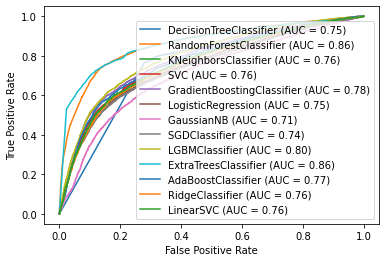

In [102]:
disp = plot_roc_curve(dtc, X_test, y_test)

plot_roc_curve(ran,X_test, y_test, ax = disp.ax_)

plot_roc_curve(knn,X_test, y_test, ax = disp.ax_)

plot_roc_curve(svm,X_test, y_test, ax = disp.ax_)

plot_roc_curve(gbc,X_test, y_test, ax = disp.ax_)

plot_roc_curve(lor,X_test, y_test, ax = disp.ax_)

plot_roc_curve(nbc,X_test, y_test, ax = disp.ax_)

plot_roc_curve(sgd,X_test, y_test, ax = disp.ax_)

plot_roc_curve(lgm,X_test, y_test, ax = disp.ax_)

plot_roc_curve(etc,X_test, y_test, ax = disp.ax_)

plot_roc_curve(ada,X_test, y_test, ax = disp.ax_)

plot_roc_curve(rdg,X_test, y_test, ax = disp.ax_)

plot_roc_curve(lsv,X_test, y_test, ax = disp.ax_)